In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# matplotlib库简介

## 什么是matplotlib
matplotlib是一款命令式、较底层、可定制性强、图表资源丰富、简单易用的python 2D绘图库，以渐进、交互式方式实现数据可视化。

matplotlib支持多种图表的绘制，支持折线图、柱状图、直方图、饼图、散点图、面积图、趋势图、箱型图、小提琴图、数据地图、雷达图、漏斗图等等。

使用matplotlib绘图主要是用到其pyplot模块，它可以程序化生成多种多样的图表，只需要简单的函数就可以自主化定制图表，添加文本、点、线、颜色、图像等元素。

## 为什么使用matplotlib

matplotlib算是python绘图的元老级库，类似编程语言里的C语言。很多其它的python高级绘图库是基于matplotlib开发的，比如**seaborn**、ggplot、plotnine、holoviews、basemap等。

虽然在实践中，我们可能通过pandas的plot函数或者seaborn库可以直接绘制精美的图表，但如果想要绘制更精美的图表，是很有必要了解底层matplotlib库的一些细节的。


# 常用图适用场景

## 折线图

折线图(line chart)用于显示数据在一个连续的时间间隔或者时间跨度上的变化，它的特点是反映事物随时间或有序类别而变化的趋势。示例图如下：

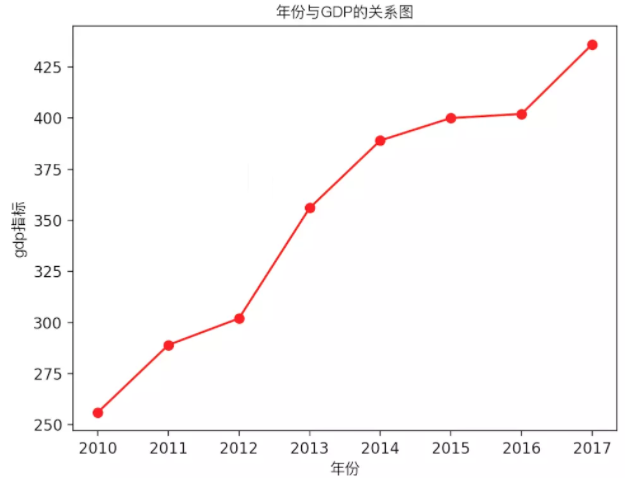

折线图应用场景：

* 折线图适合X轴是一个连续递增或递减的，对于没有规律的，则不适合使用折线图，建议使用柱状图。
* 如果折线图条数过多，则不应该都绘制在一个图上。

## 柱状图

典型的柱状图（又名条形图,bar chart），使用垂直或水平的柱子显示类别之间的数值比较。其中一个轴表示需要对比的分类，另一个轴代表相应的数值。

柱状图有别于直方图，柱状图无法显示数据在一个区间内的连续变化趋势。柱状图描述的是**分类数据**，回答的是每一个分类中“有多少？”这个问题。 示例图如下：
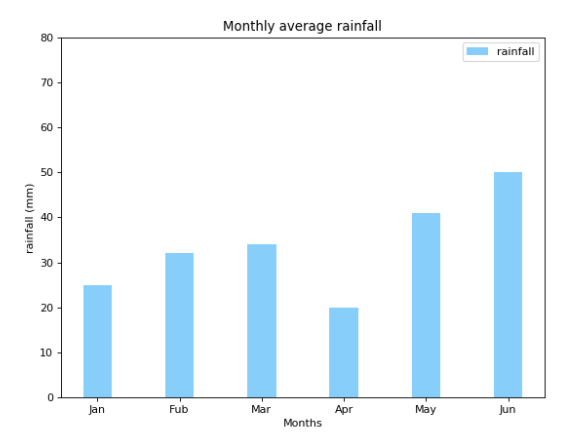

柱状图应用场景：

* 适用于分类数据对比。
* 垂直条形图最多不超过12个分类（也就是12个柱形），横向条形图最多不超过30个分类。如果垂直条形图的分类名太长，那么建议换成横向条形图。
* 柱状图不适合表示趋势，如果想要表示趋势，应该使用折线图。

## 直方图

直方图(Histogram)，又称质量分布图，是一种统计报告图，由一系列高度不等的条纹表示数据分布的情况。一般用横轴表示数据类型，纵轴表示分布情况。

直方图是数值数据分布的精确图形表示。为了构建直方图，第一步是将值的范围分段，即将整个值的范围分成一系列间隔，然后计算每个间隔中有多少值。这些值通常被指定为连续的，不重叠的变量间隔。间隔必须相邻，并且通常是（但不是必须的）相等的大小。

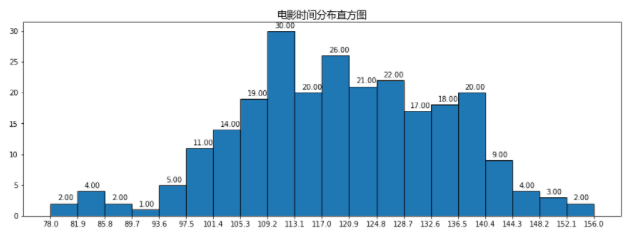

直方图的应用场景：

* 显示各组数据数量分布的情况。
* 用于观察异常或孤立数据。
* 抽取的样本数量过小，将会产生较大误差，可信度低，也就失去了统计的意义。因此，样本数不应少于50个。

## 散点图

散点图(scatter plot)也叫 X-Y 图，它将所有的数据以点的形式展现在直角坐标系上，以显示变量之间的相互影响程度，点的位置由变量的数值决定。

通过观察散点图上数据点的分布情况，我们可以推断出变量间的相关性。如果变量之间不存在相互关系，那么在散点图上就会表现为随机分布的离散的点，如果存在某种相关性，那么大部分的数据点就会相对密集并以某种趋势呈现。数据的相关关系主要分为：**正相关**（两个变量值同时增长）、**负相关**（一个变量值增加另一个变量值下降）、不相关、线性相关、指数相关等，表现在散点图上的大致分布如下图所示。那些离点集群较远的点我们称为离群点或者异常点。

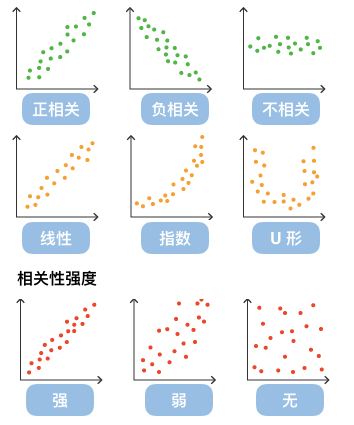

散点图的应用场景：
* 观察数据集的分布情况。
* 通过分析规律，根据样本数据特征计算出回归方程。

## 饼状图

饼状图通常用来描述量、频率和百分比之间的关系。在饼图中，每个扇区的弧长大小为其所表示的数量的比例。

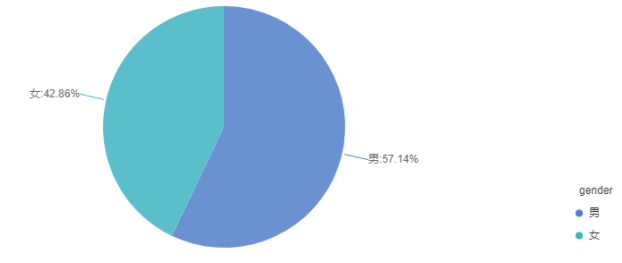

饼状图的应用场景：

* 展示多个分类的占比情况，分类数量建议不超过9个。
* 对于一些占比值非常接近的，不建议使用饼状图，可以使用柱状图。

## 箱型图

箱线图（Box-plot）又称为盒须图、盒式图或箱型图，是一种用作显示一组数据分散情况资料的统计图。因形状如箱子而得名。在各种领域也经常被使用，它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比较。箱线图的绘制方法是：先找出一组数据的**上限值、下限值、中位数（Q2）和下四分位数（Q1）以及上四分位数（Q3）**；然后，连接两个四分位数画出箱子；再将最大值和最小值与箱子相连接，中位数在箱子中间。

上限的计算规则是：
* IQR=Q3-Q1
* 上限=Q3+1.5IQR
* 下限=Q1-1.5IQR

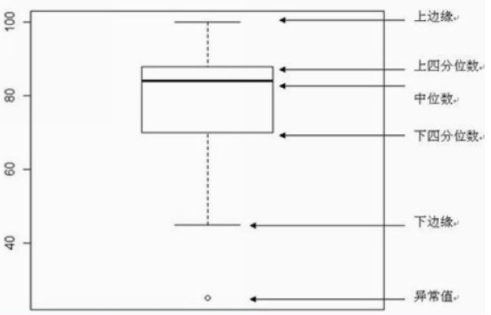

箱线图的应用场景：

* 直观明了地识别数据中的异常值。
* 利用箱线图判断数据的偏态。
* 利用箱线图比较几批数据的形状。
* 箱线图适合比较多组数据，如果知识要看一组数据的分布情况，建议使用直方图。

# matplotlib基本使用

matplotlib.pyplot包含了一系列类似于matlab的画图函数。

In [2]:
import matplotlib.pyplot as plt

图形绘制流程：
* 1. 创建画布 -- plt.figure(figszie,dpi)
        * figsize: 指定图的长宽，单位是英寸
        * dpi：图像的清晰度，每英寸的像素点
* 2. 绘制图像 -- plt.plot(x,y)
* 3. 添加辅助信息
    * 添加x,y轴刻度： plt.xticks(),plt.yticks()
    * 添加网格显示：plt.grid()
    * 添加轴和标题：plt.xlabel(),plt.ylabel(),plt.title()
    * 添加注释文本：plt.annotate()
    * 添加图例：plt.legend()
* 4. 保存图像（可选） -- plt.savefig()
* 4. 显示图像 -- plt.show()
    * 注意：jupyter notebook可自动显示图像，可不写。

## 画出初始折线图

为了更好地理解所有基础绘图功能，我们通过天气温度变化的绘图来融合所有的基础API使用

需求：画出某城市11点到12点，1小时内每分钟的温度变化折线图，温度范围在15度~18度

效果：
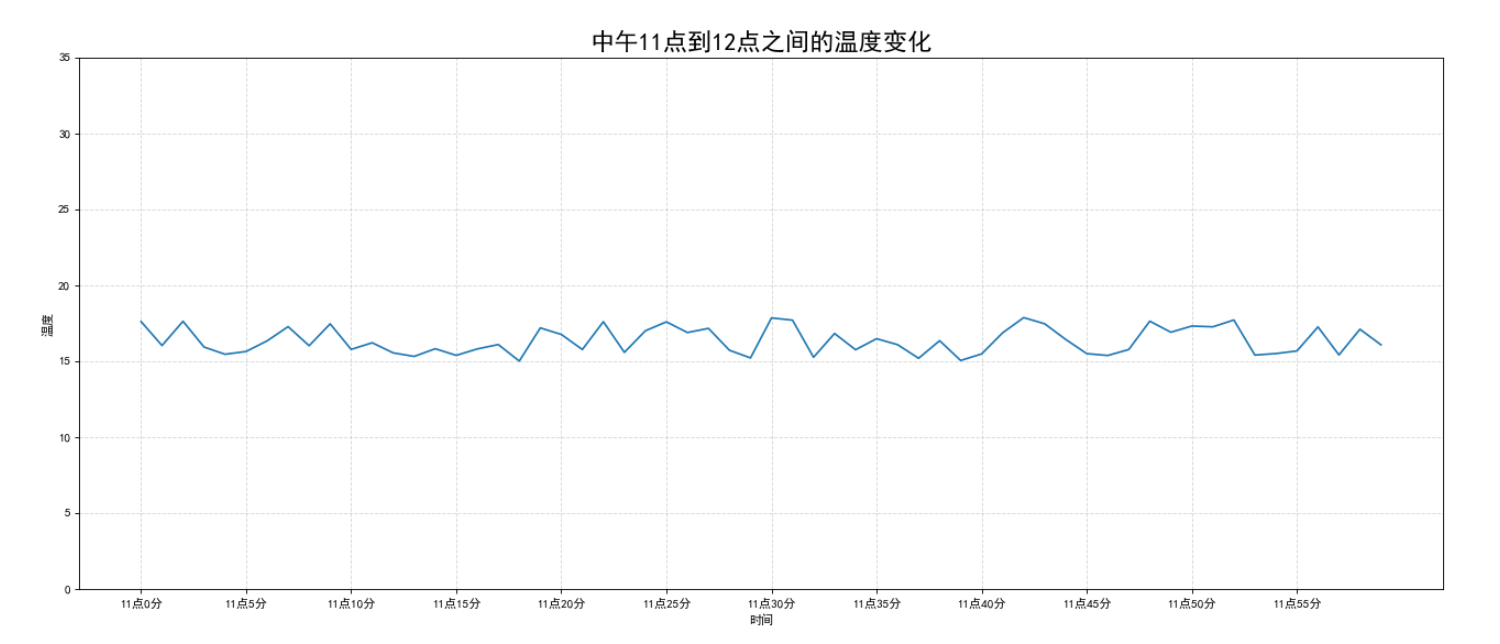

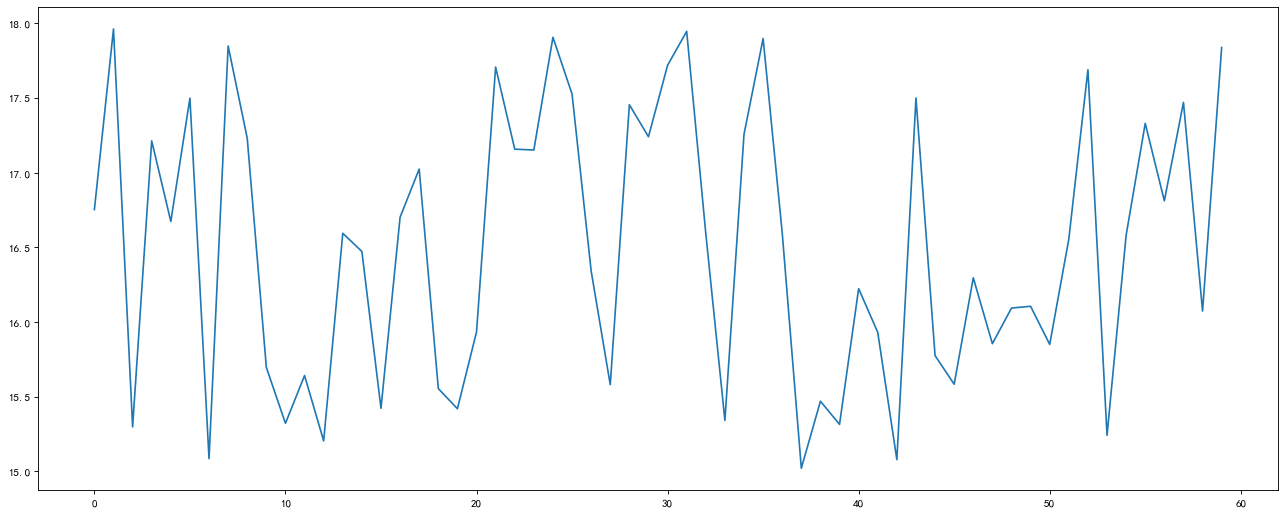

In [3]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制折线图
plt.plot(x, y_shanghai)

* 这时候我们我们想要添加x,y轴刻度，使得数据表示更加清晰。

## 添加自定义x，y刻度

* plt.xticks(x, **kwargs)
    * x:要显示的刻度值
* plt.yticks(y, **kwargs)
    * y:要显示的刻度值

([<matplotlib.axis.YTick at 0x225b1495048>,
 <a list of 8 Text yticklabel objects>)

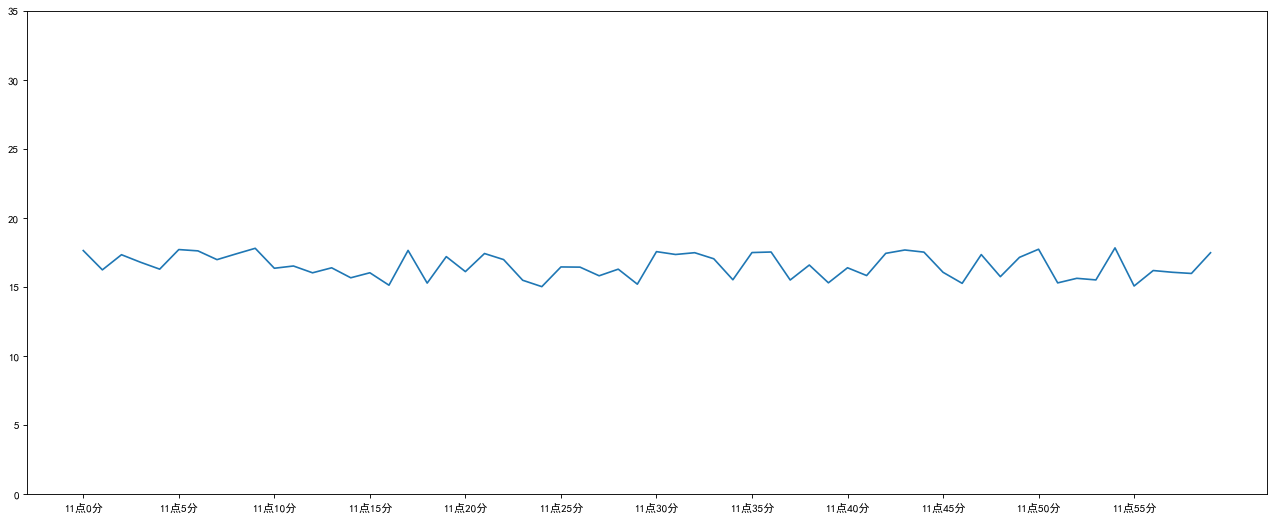

In [4]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制折线图
plt.plot(x, y_shanghai)

##################### New #########################

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 修改x,y轴左表的刻度显示
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

##################### New #########################

* 这时候我们发现值不太好好观察，所以为了更加清除地观察图形对应的值，需要添加网格显示。

## 添加网格显示

* plt.grid(b=True, linestyle='--', alpha=0.5)
    * b: True 表示显示网格grid
    * linestyle：线条格式,常见的如下：
        * '-': 实线
        * '--': 虚线
    * alpha: 透明度

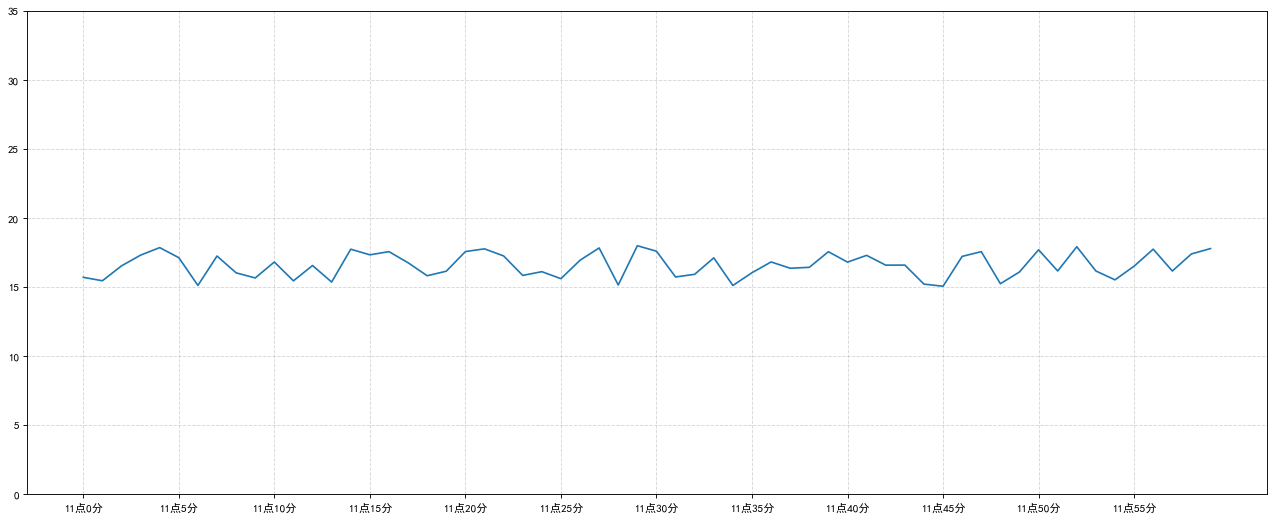

In [16]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制折线图
plt.plot(x, y_shanghai)

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 修改x,y轴左表的刻度显示
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

##################### New #########################

# 添加网格显示
plt.grid(True, linestyle='--', alpha=0.5)

##################### New #########################

* 这时候我们想要添加一些描述信息，比如x，y轴和标题

## 添加轴和标题

* plt.xlabel()：添加x轴
* plt.ylabel()：添加y轴
* plt.title():添加标题

Text(0.5, 1.0, '中午11点到12点之间的温度变化')

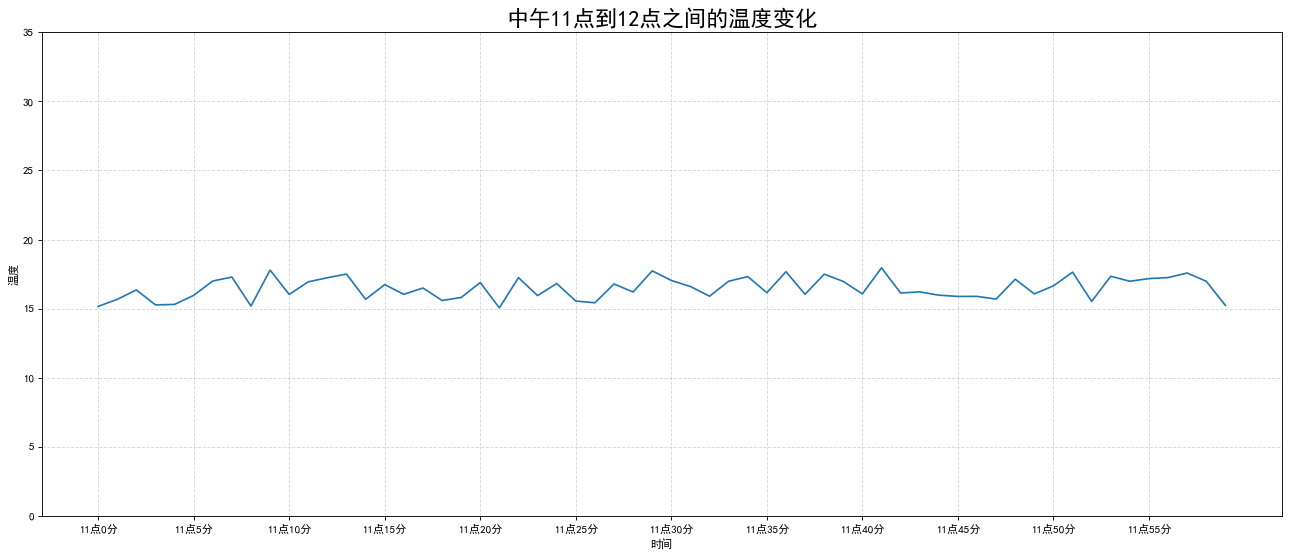

In [8]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制折线图
plt.plot(x, y_shanghai)

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 修改x,y轴左表的刻度显示
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

# 添加网格显示
plt.grid(True, linestyle='--', alpha=0.5)

##################### New #########################

# 添加x，y轴和标题
plt.xlabel('时间')
plt.ylabel('温度')
plt.title('中午11点到12点之间的温度变化',fontsize=20)

##################### New #########################


## 添加注释文本

有时候需要在图形中的某个点标记或者注释一下。那么我们可以使用plt.annotate()来实现。

* plt.annotate(text,xy,xytext,arrowprops={})
    * text:  注释的文本
    * xy： 是需要注释的点坐标
    * xytext: 是注释文本的坐标
    * arrowprops： 是箭头的样式属性

Text(18, 22, '温度变化曲线')

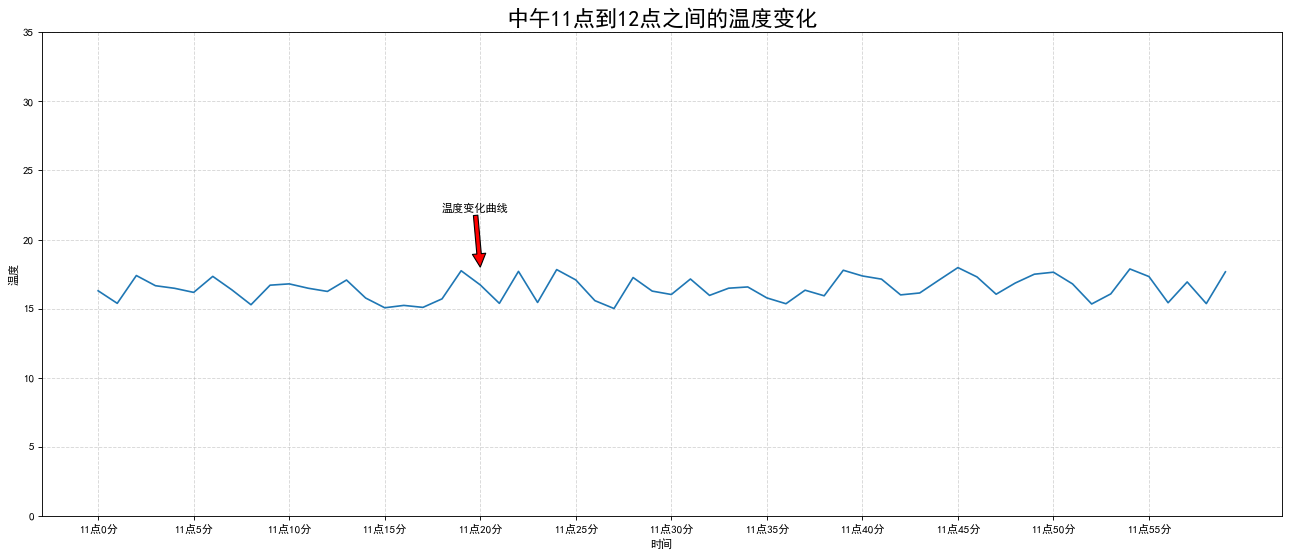

In [34]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制折线图
plt.plot(x, y_shanghai)

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 修改x,y轴左表的刻度显示
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

# 添加网格显示
plt.grid(True, linestyle='--', alpha=0.5)

# 添加x，y轴和标题
plt.xlabel('时间')
plt.ylabel('温度')
plt.title('中午11点到12点之间的温度变化',fontsize=20)

##################### New #########################

# 添加注释
plt.annotate('温度变化曲线', xy=(20, 18), xytext=(18, 22),
arrowprops=dict(facecolor='red'))

##################### New #########################

## 图像保存

* plt.savefig(path)

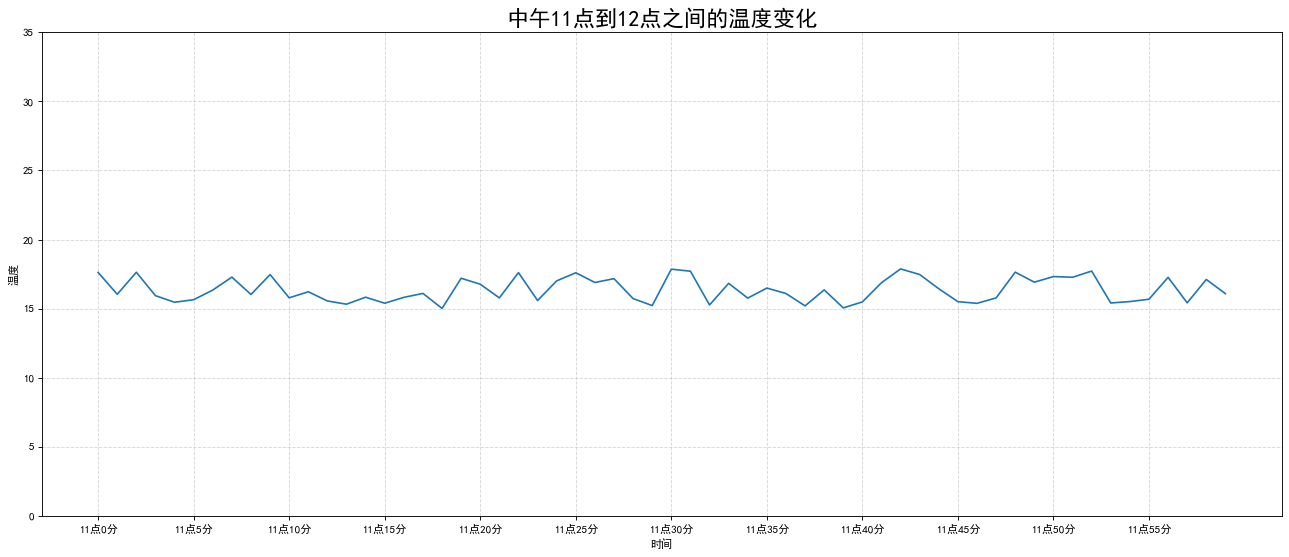

In [44]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制折线图
plt.plot(x, y_shanghai)

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 修改x,y轴左表的刻度显示
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

# 添加网格显示
plt.grid(True, linestyle='--', alpha=0.5)

# 添加x，y轴和标题
plt.xlabel('时间')
plt.ylabel('温度')
plt.title('中午11点到12点之间的温度变化',fontsize=20)

##################### New #########################

# 保存图片
plt.savefig('./data/sample1.png')

##################### New #########################

## 一个坐标系中绘制多个图像

需求：再添加一个城市的温度变化

收集到北京当天温度变化情况，温度在1度到3度。怎么去添加另一个在同一坐标系当中的不同图形，其实很简单只需要再次plot即可，但是需要区分线条，比如用颜色，线条格式来区分。

Text(0.5, 1.0, '中午11点到12点之间的温度变化')

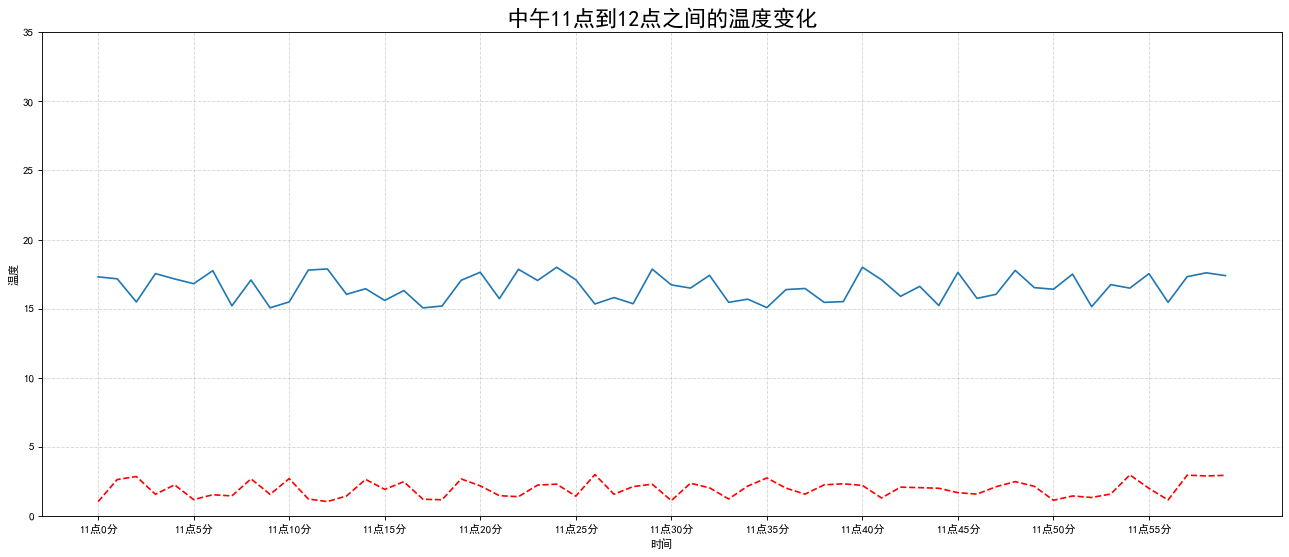

In [41]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

##################### New #########################

# 添加北京的温度数据
y_beijing = [np.random.uniform(1,3) for _ in x]

##################### New #########################

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制上海折线图
plt.plot(x, y_shanghai)

##################### New #########################

# 绘制北京折线图
plt.plot(x, y_beijing, color='r',linestyle='--')

##################### New #########################

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 修改x,y轴左表的刻度显示
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

# 添加网格显示
plt.grid(True, linestyle='--', alpha=0.5)

# 添加x，y轴和标题
plt.xlabel('时间')
plt.ylabel('温度')
plt.title('中午11点到12点之间的温度变化',fontsize=20)


## 设置图形风格

常见的颜色和字符风格，如下表所示：

|'color'代码|颜色|
|:-------:|:---:|
|r | 红色|
|g | 绿色|
|b | 蓝色|
|w | 白色|
|c | 青色|
|m | 洋红|
|y | 黄色|
|k | 黑色|

|'linestyle'代码|颜色|
|:-------:|:---:|
|- | 实线|
|-- | 虚线|
|-. | 点划线|
|: | 点虚线|



## 显示图例

现在画出了北京和上海的温度变化图，但是无法区分哪条属于北京，所以需要添加图例。

* plt.legend(loc='best')
    * loc: 图例的显示位置，'best'是matplotlib自动判断最好的位置

注意：如果只在plt.plot()中设置label还不能最终显示出图例，还需要通过plt.legend()将图例显示出来。

Text(0.5, 1.0, '中午11点到12点之间的温度变化')

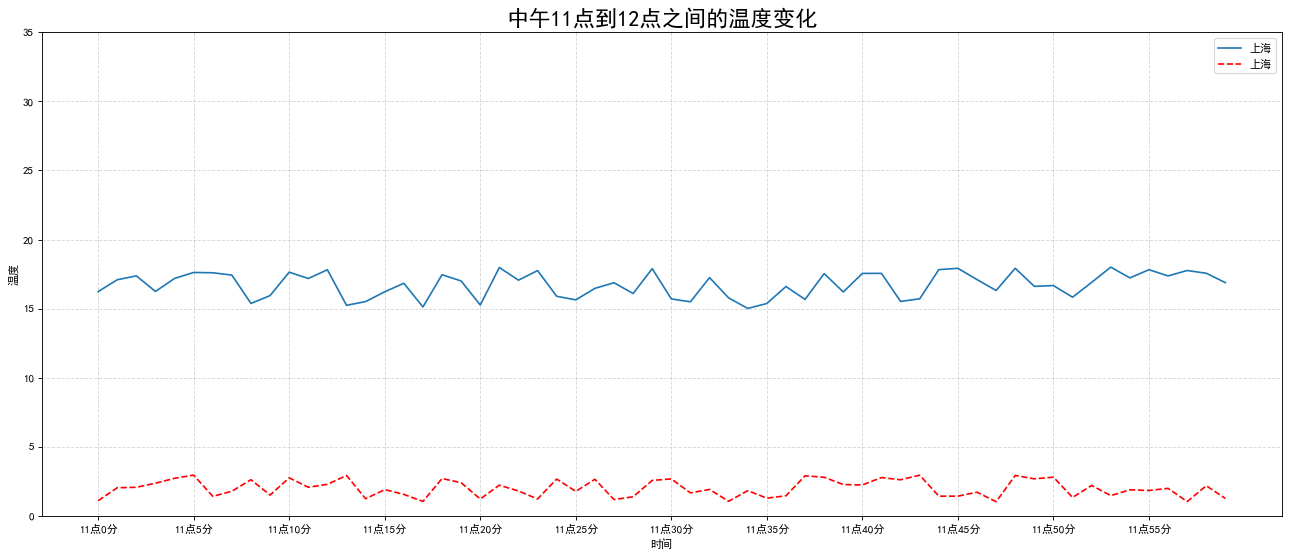

In [43]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]

# 添加北京的温度数据
y_beijing = [np.random.uniform(1,3) for _ in x]

# 创建画布
plt.figure(figsize=(20,8),dpi=80)

##################### New #########################

# 绘制上海折线图
plt.plot(x, y_shanghai, label='上海')

# 绘制北京折线图
plt.plot(x, y_beijing, color='r',linestyle='--',label='北京')

# 显示图例
plt.legend(loc="best")

##################### New #########################

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 修改x,y轴左表的刻度显示
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

# 添加网格显示
plt.grid(True, linestyle='--', alpha=0.5)

# 添加x，y轴和标题
plt.xlabel('时间')
plt.ylabel('温度')
plt.title('中午11点到12点之间的温度变化',fontsize=20)


## 多个坐标系显示

如果我们想要将上海和北京的天气图显示在同一个图的不同坐标系当中，效果如下：


可以通过subplots函数实现：
* plt.subplots(nrows=1, ncols=1, **fig_kw) :创建一个带有多个axes(坐标系/绘图区)的图
    * Parameters：
        * nrows,ncols: 设置有几行几列坐标系
        * **fig_kw：figure的参数设置
    * Returns：
        * fig:图对象
        * axes：返回相应数量的坐标系
    * 设置标题等方法不同：
        * set_xticks
        * set_yticks
        * set_xlabel
        * set_ylabel

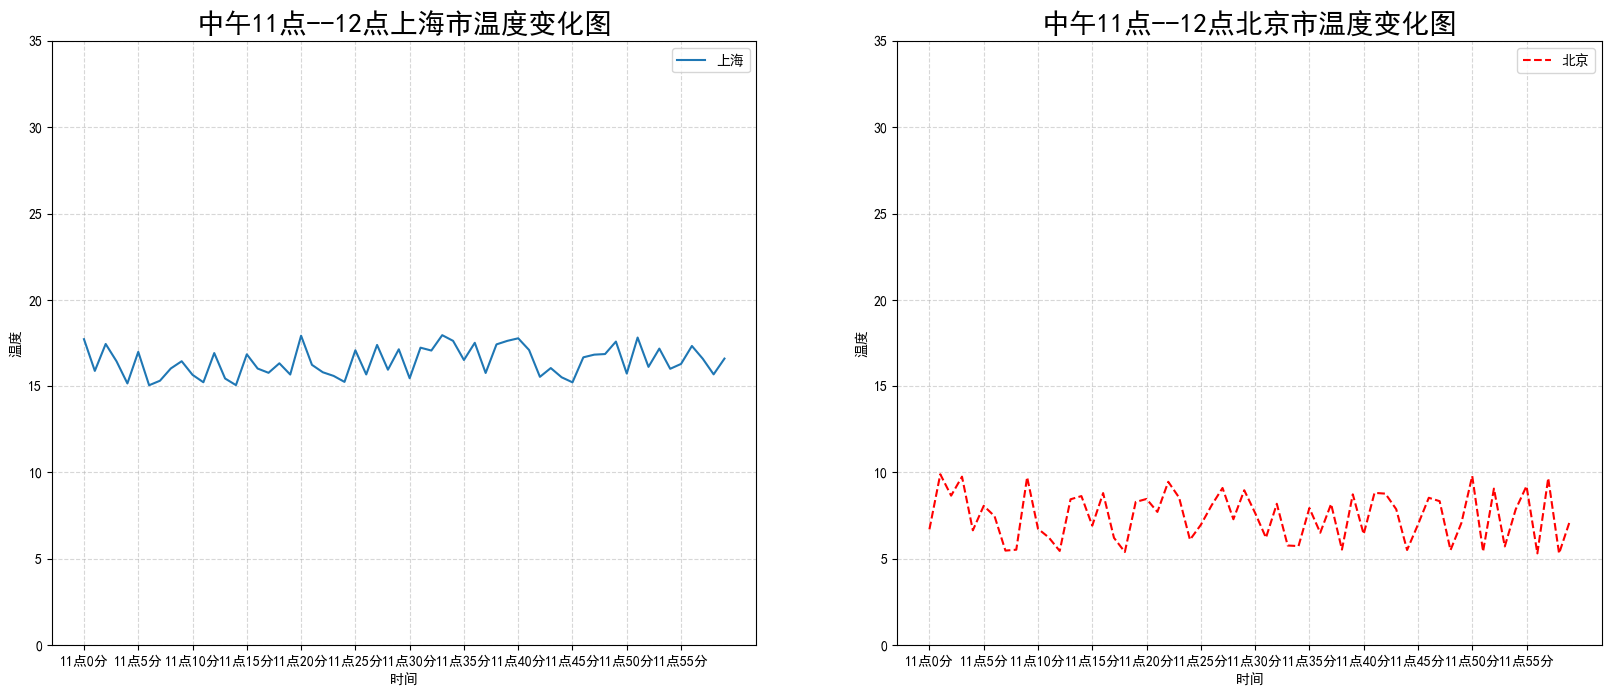

In [49]:
# 准备x,y坐标轴数据
x = range(60)
y_shanghai = [np.random.uniform(15,18) for _ in x]
y_beijing = [np.random.uniform(5,10) for _ in x]

##################### New #########################

# 创建画布
'''
plt.figure(figsize=(20,8),dpi=80)
'''
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=100)

# 绘制上海折线图
'''
plt.plot(x, y_shanghai, label='上海')
'''
axes[0].plot(x, y_shanghai, label="上海")

# 绘制北京折线图
'''
plt.plot(x, y_beijing, color='r',linestyle='--',label='北京')
'''
axes[1].plot(x, y_beijing, color="r", linestyle="--", label="北京")

# 构造x轴刻度标签
x_ticks_label = ['11点{}分'.format(i) for i in x]

# 构造y轴刻度标签
y_ticks = range(40)

# 设置上海和北京的xy轴刻度
'''
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])
'''
axes[0].set_xticks(x[::5])
axes[0].set_yticks(y_ticks[::5])
axes[0].set_xticklabels(x_ticks_label[::5])
axes[1].set_xticks(x[::5])
axes[1].set_yticks(y_ticks[::5])
axes[1].set_xticklabels(x_ticks_label[::5])

# 添加网格显示
'''
plt.grid(True, linestyle='--', alpha=0.5)
'''
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[1].grid(True, linestyle="--", alpha=0.5)

# 添加x，y轴和标题
'''
plt.xlabel('时间')
plt.ylabel('温度')
plt.title('中午11点到12点之间的温度变化',fontsize=20)

'''
axes[0].set_xlabel("时间")
axes[0].set_ylabel("温度")
axes[0].set_title("中午11点--12点上海市温度变化图", fontsize=20)
axes[1].set_xlabel("时间")
axes[1].set_ylabel("温度")
axes[1].set_title("中午11点--12点北京市温度变化图", fontsize=20)

# 显示图例
'''
plt.legend(loc='best')'
'''
axes[0].legend(loc='best')
axes[1].legend(loc='best')

##################### New #########################

## matplotlib 配置

### 画布风格设置

matplotlib图片默认内置了几种画布风格。我们可以通过plt.style.available来查看内置的所有风格:

In [7]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

* 在绘制的，可以使用plt.style.use方法来使用不同的风格。示例代码如下：

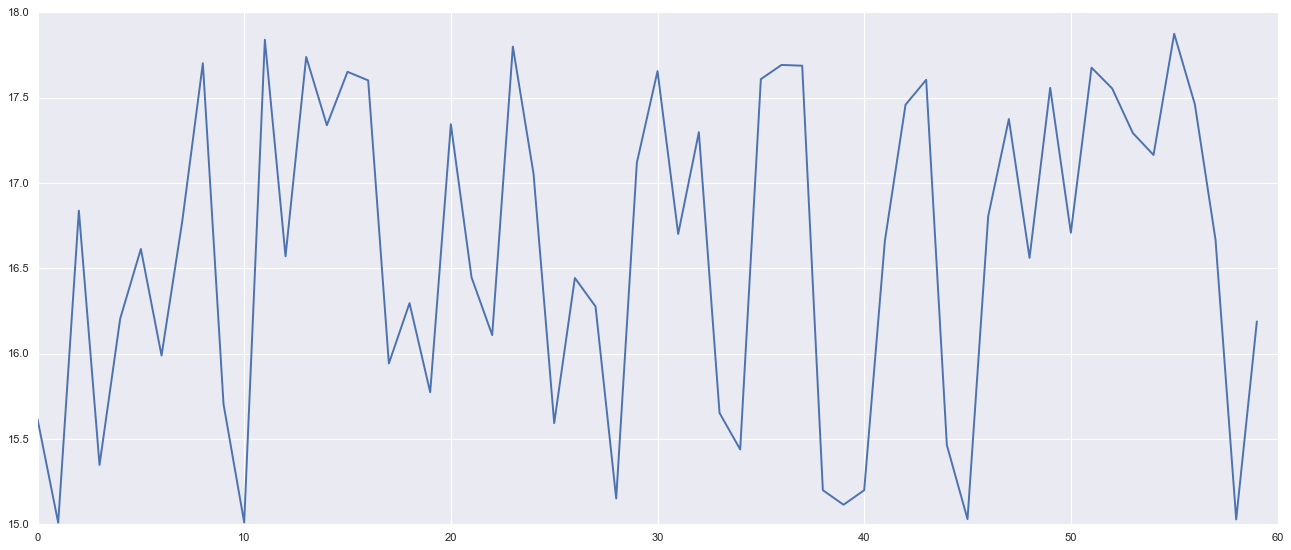

In [67]:
# 设置不同的风格
plt.style.use("seaborn")

# 准备x,y坐标轴数据
x = range(60)
y = [np.random.uniform(15,18) for _ in x]

# 创建画布，并绘制折线图
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x, y)


### 修改默认的配置

修改默认的配置可以通过matplotlib.rcParams来设置，比如修改字体，修改线条大小和宽度等。示例代码如下：

In [69]:
# 设置字体为仿宋
plt.rcParams['font.sans-serif'] = ['SimHei']

# 正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 设置字体大小为20
plt.rcParams['font.size'] = 20

# 设置线条宽度
plt.rcParams['lines.linewidth'] = 2


* 常见的配置显示如下表：

|plt.rcParams参数| 描述|
|:--:|:--:|
|figure.figsize|调整生成的图标尺寸|
|figure.dpi|设置每英寸像素点|
|font.sans-serif |设置字体|
|font.size|字体大小|
|hist.bins|直方图分箱个数|
|lines.linewidth|线宽|
|lines.marker|标记样式|
|savefig.fomrat|保存图片的格式|
|savefig.jpeg_quality|图片质量|
|text.color|文本颜色|
|timezone|失去格式|

# matplotlib常见图形绘制

Matplotlib能够绘制折线图、柱状图、直方图、散点图、饼图、箱型图等。

## 折线图

* 折线图：以折线的上升或下降来表示统计数量的增减变化的统计图

* 特点：能够显示数据的变化趋势，反映事物的变化情况。(变化)

* api：plt.plot(x, y)

演示案例已在matplotlib基本使用小结中展示了。

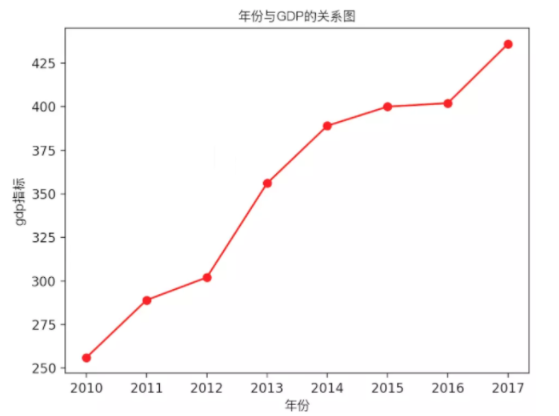

## 柱状图

* 柱状图：排列在工作表的列或行中的数据可以绘制到柱状图中。

* 特点：绘制连离散的数据,能够一眼看出各个数据的大小,比较数据之间的差别。(统计/对比)


### 柱形图的绘制

* api：plt.bar(x, height, width, bottom，align='center', **kwargs)
    * x：一个数组或者列表，代表需要绘制的柱状图的x轴的坐标点
    * height：一个数组或者列表，代表需要绘制柱状图的y轴的坐标点
    * width：每一个条形图的宽度，默认是0.8
    * bottom：y轴的基线，默认是0
    * align：对齐方式，默认是center
    * **kwargs：其他的参数设置，比如设置颜色color等

* 比如我们现在有2019年贺岁片票房的数据，用柱状图来绘制每部电影以及票房数据

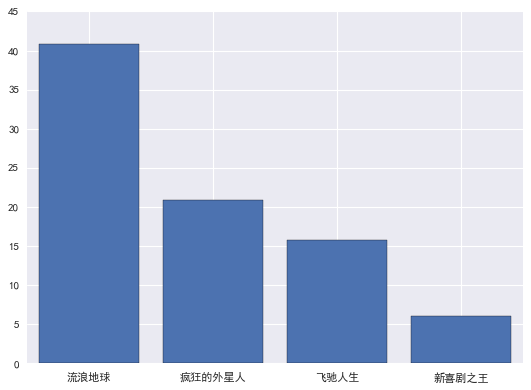

In [99]:
# 读取票房数据
movies = {"流浪地球": 40.78,
          "疯狂的外星人": 20.83,
          "飞驰人生": 15.77,
          "新喜剧之王":6.10}

# 绘制柱状图
plt.bar(np.arange(len(movies)),list(movies.values()))
plt.xticks(np.arange(len(movies)),list(movies.keys()))
plt.grid(True)

### 横向柱形图

* 横向条形图需要使用plt.barh这个方法跟bar非常的类似，只不过把方向进行旋转。参数跟bar类似，但也有区别。如下：
    
    * y：数组或列表，代表需要绘制的条形图在y轴上的坐标点。
    * width：数组或列表，代表需要绘制的条形图在x轴上的值（也就是长度）。
    * height：条形图的高度，默认是0.8。
    * left：条形图的基线，也就是距离y轴的距离。


* 还是用票房数据进行演示：

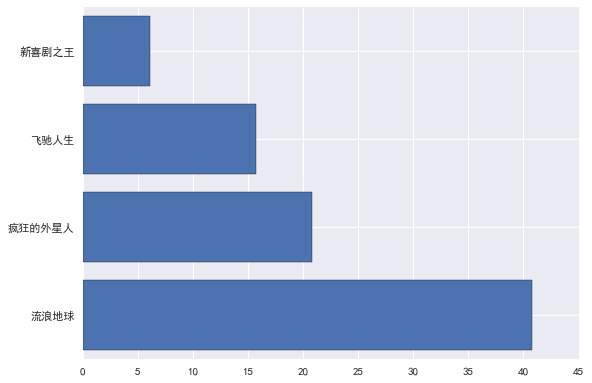

In [100]:
# 读取票房数据
movies = {"流浪地球": 40.78,
          "疯狂的外星人": 20.83,
          "飞驰人生": 15.77,
          "新喜剧之王":6.10}

# 绘制柱状图
plt.barh(np.arange(len(movies)),list(movies.values()))
plt.yticks(np.arange(len(movies)),list(movies.keys()))
plt.grid(True)

### 分组柱形图

现在有一组数据，是电影票房的前5天票房记录，现在想用分组柱形图进行展示。

([<matplotlib.axis.XTick at 0x225c80a0188>,
 <a list of 4 Text xticklabel objects>)

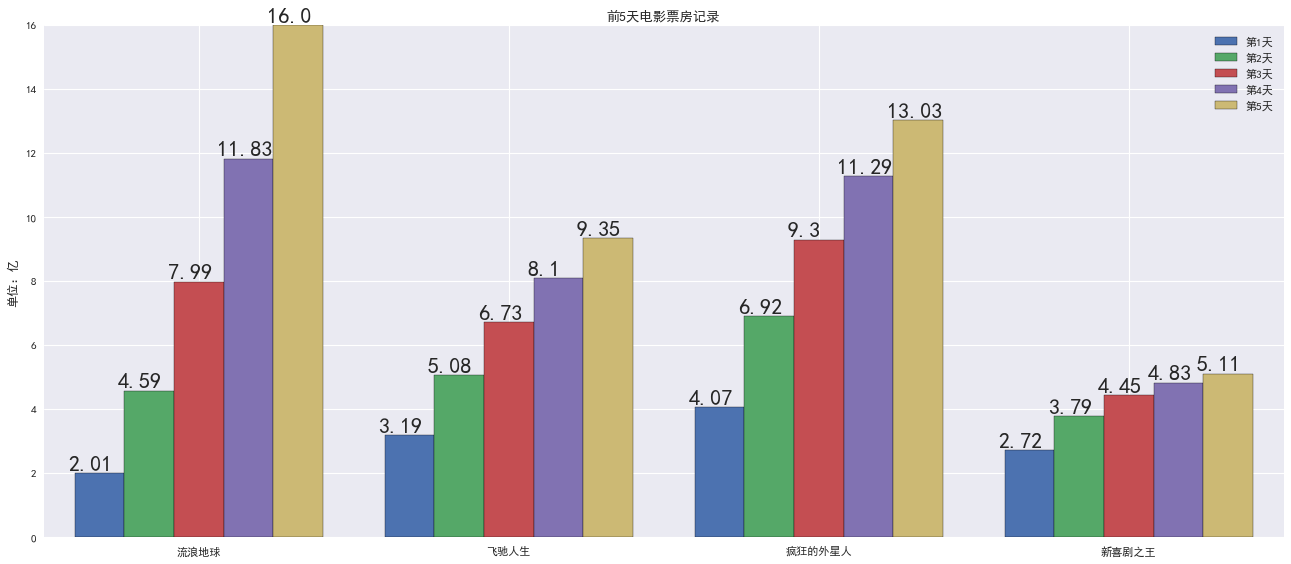

In [101]:
# 获取电影票房的前5天数据
movies = {
    "流浪地球": [2.01, 4.59, 7.99, 11.83, 16],
    "飞驰人生": [3.19, 5.08, 6.73, 8.10, 9.35],
    "疯狂的外星人": [4.07, 6.92, 9.30, 11.29, 13.03],
    "新喜剧之王": [2.72, 3.79, 4.45, 4.83, 5.11]}

# 创建画布
plt.figure(figsize=(20, 8))

# 每一个电影x轴的中心点
ind = np.arange(len(movies))

# 计算单个电影单个柱状（每一天）的长度
width = 0.8
bin_width = width / 5

# 用DataFrame存储数据
movie_pd = pd.DataFrame(movies)


# 对每一天的票房进行绘制柱状图，index为[0,1,2,3,4]表示前5天
for index in movie_pd.index:
    # 第n天的每个电影的y轴票房数据
    day_tickets = movie_pd.iloc[index]
    
    # 每个电影的第n天时x轴的位置
    xs = ind - (bin_width * (2 - index))
    
    # 进行柱状图绘制，并标清楚label
    plt.bar(xs, day_tickets, width=bin_width, label="第{}天".format(index + 1))
    
    # 标记票房数据
    for ticket, x in zip(day_tickets, xs):
        plt.annotate(ticket, xy=(x, ticket), xytext=(x-0.1, ticket+0.1))

# 设置描述信息
plt.legend()
plt.ylabel("单位：亿")
plt.title("前5天电影票房记录")
plt.grid(True)

# 设置x轴的坐标
plt.xticks(ind, movie_pd.columns)

### 堆叠柱形图

堆叠柱形图可以用来直观说明在同一组或同一类在不同的划分标准下的表现情况，如下图案例：

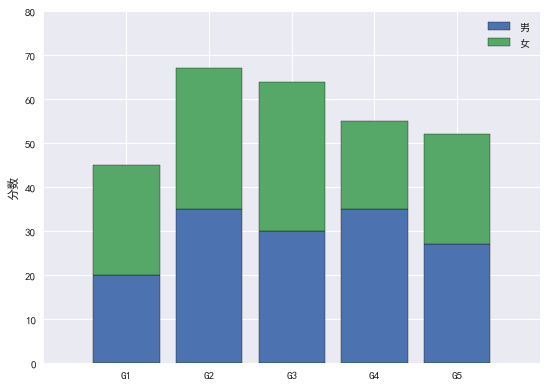

In [110]:
# 获取数据和分组信息
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
groupNames = ('G1','G2','G3','G4','G5')

# 获取x轴
xs = np.arange(len(menMeans))

# 绘制堆叠柱形图
plt.bar(xs,menMeans,label='男')
plt.bar(xs,womenMeans,bottom=menMeans,label='女')

# 设置描述信息
plt.ylabel('分数')
plt.xticks(xs,groupNames)
plt.yticks(np.arange(0, 81, 10))
plt.legend()


在绘制女性得分的条形图的时候，因为要堆叠在男性得分的条形图上，所以使用到了一个bottom参数，就是距离x轴的距离。通过对贴条形图，我们就可以清楚的知道，哪一个队伍的综合排名是最高的，并且在每个队伍中男女的得分情况。

## 直方图

* 直方图：由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据范围，纵轴表示分布情况。

* 特点：绘制连续性的数据展示一组或者多组数据的分布状况(统计)

* api：plt.hist(x, bins, range, density, cumulative, **kwargs)
    * 参数：
        * x: 数组或可以循环的序列。直方图将会从这组数据中进行分组。
        * bins: 数字或序列。
            * 数字：代表分成多少组。
            * 序列：按照序列指定的值进行分组，比如序列[1,2,3,4],那么分组将会分成3组，分别是[1,2),[2,3),[3,4]。
        * range:元祖或None。如果是元祖，那么指定x划分区间的最大值和最小值。
        * density: 默认是False。如果是True，那么将使用频率分布直方图。每个条形表示的不是个数，而是 频率/组距。
        * cumulative: 如果这个和density都等于True, 那么返回值的第一个参数会不断的累加，最终等于1。
        *  **kwargs: 其他参数，详细可看文档。
    * 返回值：
        * n: 数组。每个区间内值出现的个数，如果density=True,那么返回的是 频率/组距。
        * bins: 数组。区间的值。
        * patches: 数组。
        
* 假设我们有一组电影时长的数据，现在想要用直方图来进行查看

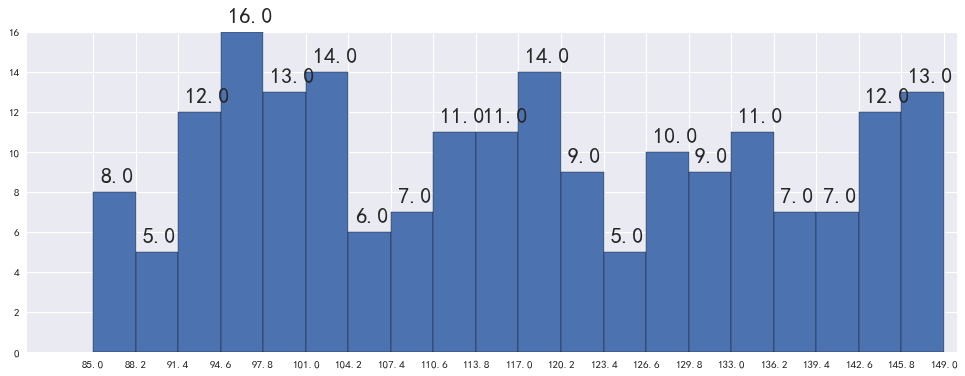

In [117]:
# 获取电影时长的数据
movies_time = np.random.randint(85, 150, 200)

# 创建画布
plt.figure(figsize=(15, 5))

# 分成20组，进行直方图的绘制
nums, bins, patches = plt.hist(movies_time, bins=20, edgecolor='k')

# 添加x轴信息
plt.xticks(bins, bins)

# 添加每组的数据描述
for num, bin in zip(nums, bins):
    plt.annotate(num, xy=(bin, num), xytext=(bin+0.5, num+0.5))

## 散点图

* 散点图：用两组数据构成多个坐标点，考察坐标点的分布,判断两变量之间是否存在某种关联或总结坐标点的分布模式。

* 特点：判断变量之间是否存在数量关联趋势,展示离群点(分布规律)

* api：plt.scatter(x,y,s,c,marker,**kwargs)
    * x,y: 分别是x轴和y轴的值。两者的数据长度必须一致。
    * s: 点的尺寸，数字或序列。
        * 数字：一个具体的数字代表散点图的所有点都是一样大小。
        * 序列：序列的长度应该和x轴数量一致。
    * c：c的颜色，默认是蓝色。
    * marker: 标记点，默认是原点。
    * **kwargs:其他参数。
    

假设我们有2组数据，用散点图进行绘制：

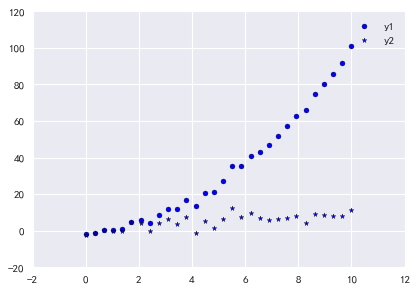

In [127]:
# 产生0-10之间30个元素的等差数列
x = np.linspace(0, 10, 30)

# 产生30个标准正态分布的元素
noise = np.random.randn(30)

# 产生叠加噪声的数据系列1
y1 = x**2 + 2 * noise

# 产生叠加噪声的数据系列2
y2 = x + 3 * noise 

# 创建画布
plt.figure(figsize=(6, 4))


# 绘制散点图
plt.scatter(x, y1, marker='o',label='y1')
plt.scatter(x, y2, marker='*',label='y2')

# 添加图例
plt.legend()

## 饼图

## 箱型图